## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 

![Equator](equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!


WEATHERPY ANALYSIS AND OBSEDRVATIONS

1) There is no correlation between latitude and Humidity
2) There is no correlation between latitude and Cloudiness
3) There is a very clear correlation between temperature and latitude.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import time
import json
import config

In [26]:
lats=np.random.randint(-90,90, size=1500)
long=np.random.randint(-180, 180, size=1500)
points=pd.DataFrame({"Latitude":lats, "Longitude":long})
points

,Latitude,Longitude
0,-55,-61
1,82,-89
2,-60,9
3,39,-141
4,25,-42
5,-61,-145
6,-56,131
7,-10,-19
8,25,-156
9,-63,-6


In [43]:
# Do a for loop to go through 500 cities for longitude and latitude

api_data=[]
cities_list=[]
for index, row in points.iterrows():
    url=f"http://api.openweathermap.org/data/2.5/weather?lat={row['Latitude']}&lon={row['Longitude']}&units=Imperial&APPID={config.api_key}"
    city = citipy.nearest_city(row['Latitude'],row['Longitude']).city_name
    if city not in cities_list:
        cities_list.append(city)
    results=requests.get(url).json()
    api_data.append(results)   
    print(index, city)
    

0 ushuaia
1 qaanaaq
2 hermanus
3 fortuna
4 ponta do sol
5 mataura
6 portland
7 georgetown
8 kailua
9 cape town
10 okhotsk
11 pangnirtung
12 ushuaia
13 tabiauea
14 vaitupu
15 isangel
16 nouadhibou
17 cape town
18 taolanaro
19 san patricio
20 mount isa
21 praia da vitoria
22 qaanaaq
23 saldanha
24 hami
25 prainha
26 fairbanks
27 puerto escondido
28 ushuaia
29 kavieng
30 saint-philippe
31 yining
32 rio grande
33 taoudenni
34 marsh harbour
35 torbay
36 atuona
37 jamestown
38 ilulissat
39 ushuaia
40 taolanaro
41 albany
42 chuy
43 busselton
44 harper
45 kahului
46 khatanga
47 torbay
48 victoria
49 kapaa
50 lebu
51 los llanos de aridane
52 tuatapere
53 mataura
54 cape town
55 rikitea
56 bredasdorp
57 faanui
58 albany
59 chokurdakh
60 bredasdorp
61 rikitea
62 ulety
63 patan
64 trelew
65 iqaluit
66 cap malheureux
67 florianopolis
68 chilca
69 chuy
70 havelock
71 miri
72 atuona
73 barrow
74 jamestown
75 longyearbyen
76 katsuura
77 san patricio
78 ushuaia
79 bardiyah
80 taolanaro
81 ginda
82 fare

622 atar
623 mataura
624 port alfred
625 thompson
626 jamestown
627 takoradi
628 mataura
629 mataura
630 yellowknife
631 polovinnoye
632 rabo de peixe
633 broome
634 gaogou
635 busselton
636 atuona
637 khandbari
638 wajima
639 ushuaia
640 puerto ayora
641 tuktoyaktuk
642 vaini
643 paragominas
644 yellowknife
645 mahebourg
646 yuzhnyy
647 muravlenko
648 nanakuli
649 severnyy
650 provideniya
651 quatre cocos
652 geraldton
653 luba
654 kodiak
655 olafsvik
656 verkhnyaya inta
657 barentsburg
658 norman wells
659 provideniya
660 bluff
661 tuktoyaktuk
662 cape town
663 fort nelson
664 albany
665 rikitea
666 keetmanshoop
667 hasaki
668 jamestown
669 nishihara
670 coihaique
671 tynda
672 neuquen
673 taolanaro
674 amderma
675 ushuaia
676 ushuaia
677 yellowknife
678 byron bay
679 anadyr
680 sur
681 ushuaia
682 yellowknife
683 jamestown
684 vryburg
685 zhanaozen
686 kendari
687 longyearbyen
688 along
689 haines junction
690 college
691 the pas
692 tumannyy
693 qaanaaq
694 longyearbyen
695 bredasd

1217 rikitea
1218 cape town
1219 rikitea
1220 sioux lookout
1221 butaritari
1222 rikitea
1223 beberibe
1224 babanusah
1225 lebu
1226 makakilo city
1227 batemans bay
1228 longyearbyen
1229 kapaa
1230 saint anthony
1231 macapa
1232 barrow
1233 iquique
1234 yellowknife
1235 saint-pierre
1236 busselton
1237 bredasdorp
1238 atuona
1239 tasiilaq
1240 roald
1241 albany
1242 okha
1243 mar del plata
1244 mocuba
1245 isangel
1246 santiago del estero
1247 yanchukan
1248 palora
1249 pierre
1250 port elizabeth
1251 sola
1252 kodinsk
1253 vaini
1254 cape town
1255 vostok
1256 ponta do sol
1257 iqaluit
1258 san miguel
1259 cabo san lucas
1260 samusu
1261 filadelfia
1262 tuktoyaktuk
1263 saint-philippe
1264 shaowu
1265 novoorsk
1266 lagoa
1267 saint george
1268 tiksi
1269 port elizabeth
1270 lebu
1271 taolanaro
1272 nizhneyansk
1273 half moon bay
1274 mataura
1275 punta arenas
1276 puerto ayora
1277 ushuaia
1278 cidreira
1279 henderson
1280 merritt island
1281 butaritari
1282 bluff
1283 rikitea
1284 r

In [46]:
len(cities_list)

598

In [49]:
#To save file data to a json file
#with open("weather.json","w") as outfile:
        #json.dump(api_data, outfile)

In [50]:
api_data[:3]

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -55, 'lon': -61},
  'dt': 1522466641,
  'id': 0,
  'main': {'grnd_level': 1007.53,
   'humidity': 94,
   'pressure': 1007.53,
   'sea_level': 1007.58,
   'temp': 45.15,
   'temp_max': 45.15,
   'temp_min': 45.15},
  'name': '',
  'sys': {'message': 0.1697, 'sunrise': 1522492006, 'sunset': 1522532897},
  'weather': [{'description': 'clear sky',
    'icon': '01n',
    'id': 800,
    'main': 'Clear'}],
  'wind': {'deg': 270.501, 'speed': 23.51}},
 {'base': 'stations',
  'clouds': {'all': 12},
  'cod': 200,
  'coord': {'lat': 82, 'lon': -89},
  'dt': 1522466769,
  'id': 0,
  'main': {'grnd_level': 1035.18,
   'humidity': 40,
   'pressure': 1035.18,
   'sea_level': 1041.05,
   'temp': -25.68,
   'temp_max': -25.68,
   'temp_min': -25.68},
  'name': '',
  'sys': {'message': 0.0037, 'sunrise': 1522488163, 'sunset': 1522550877},
  'weather': [{'description': 'few clouds',
    'icon': '02n',
    'id': 801,
    'main'

In [51]:
weather_results={"Latitude":[],"Longitude":[], "Temperature":[],"Humidity":[],"Cloudiness":[], "Windiness":[]}
for city_weather in api_data:
    weather_results["Latitude"].append(city_weather['coord']['lat'])
    weather_results["Longitude"].append(city_weather['coord']['lon'])
    weather_results["Temperature"].append(city_weather['main']['temp'])
    weather_results["Humidity"].append(city_weather['main']['humidity'])
    weather_results["Cloudiness"].append(city_weather['clouds']['all'])
    weather_results["Windiness"].append(city_weather['wind']['speed'])
    


weather_df=pd.DataFrame(weather_results)
weather_df.head()

,Cloudiness,Humidity,Latitude,Longitude,Temperature,Windiness
0,0,94,-55,-61,45.15,23.51
1,12,40,82,-89,-25.68,4.38
2,92,97,-60,9,34.17,18.03
3,88,94,39,-141,54.87,11.10
4,32,100,25,-42,70.71,10.98


Temperature (F) vs. Latitude

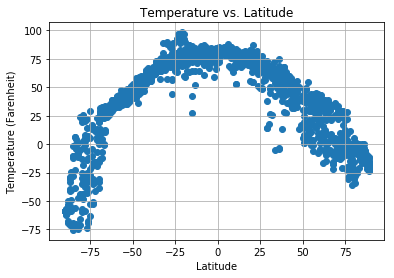

In [52]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Temperature"],marker="o")


# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevsLatitude.png")

# Show plot
plt.show()

Humidity (%) vs. Latitude

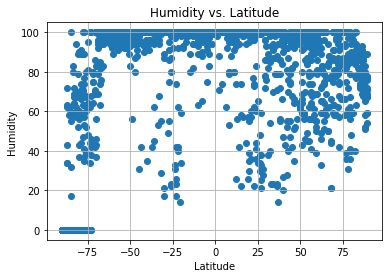

In [53]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"],marker="o")


# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvsLatitude.png")

# Show plot
plt.show()

Cloudiness (%) vs. Latitude

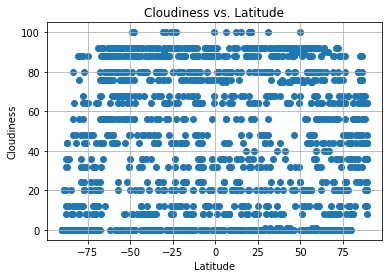

In [54]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"],marker="o")


# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessvsLatitude.png")

# Show plot
plt.show()

Wind Speed (mph) vs. Latitude

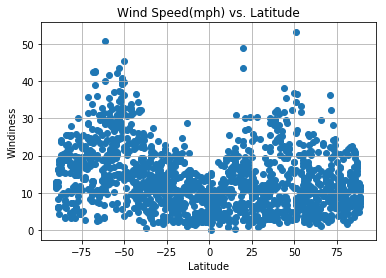

In [55]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Windiness"],marker="o")


# Incorporate the other graph properties
plt.title("Wind Speed(mph) vs. Latitude")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindinessvsLatitude.png")

# Show plot
plt.show()